# Importing libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset to a pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')

In [3]:
# First 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Last 5 rows of the dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# Shape of the Dataset
print("The shape of the dataset is ",credit_card_data.shape)

The shape of the dataset is  (284807, 31)


In [6]:
# Dataset Information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Checking the number of missing values in the dataset
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Distribution of legit transaction & fraudulent transaction
Visual = credit_card_data['Class'].value_counts()
Visual

0    284315
1       492
Name: Class, dtype: int64

In [9]:
# Changing index value from 0-1 to Legit-Fraud for good Visual.
Visual.index = ['Legit','Fraud']
Visual_Index = Visual.index
Visual_Value = Visual.values
print('This is the X for the visualization :',Visual_Index )
print('This is the Y for the visualization :', Visual_Value)

This is the X for the visualization : Index(['Legit', 'Fraud'], dtype='object')
This is the Y for the visualization : [284315    492]


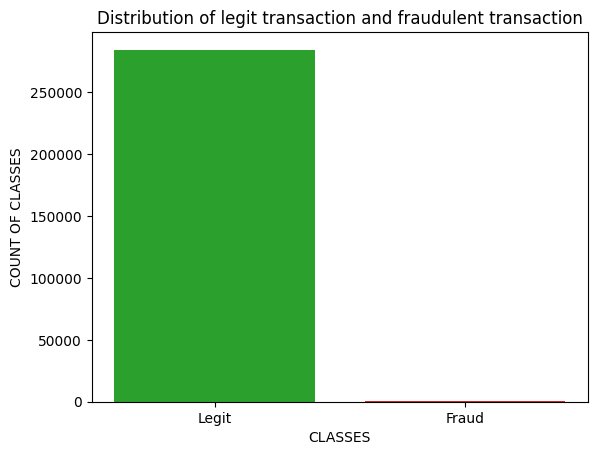

In [10]:
# Visual representation for distribution of classes.
plt.title('Distribution of legit transaction and fraudulent transaction')

# Define the color for each category.
colors = {'Legit':'tab:green','Fraud':'tab:red'}

#Creating the bar chart
plt.bar(Visual_Index,Visual_Value,color=[colors.get(x) for x in Visual_Index])
plt.xlabel('CLASSES')
plt.ylabel('COUNT OF CLASSES')
plt.show()

# About the Dataset:

### 1) This dataset contains dimensionless columns.

### 2) This dataset contains  required information for Two days Transaction .

### 3) This dataset has contains Transaction time in seconds, Transaction amount , Transaction type whether its legit transaction or fraudulent transaction , V1 to V28 are the features .

### 4))This dataset provider converted high-dimensional data onto a lower-dimensional by Principal Component Analysis(PCA) , beacuse of the credit card Transaction details are highly confidential .

### 5) There is no missing values are present in this dataset.

### 6) This dataset is highly imbalanced dataset.
#### Class - 0 : Legit Transaction.[Negative Class]
#### Class - 1 : Fraudulent Transaction.[Positive Class]


In [11]:
# Separating the dataset for the analysis
Legit = credit_card_data[credit_card_data.Class == 0]
Fraud = credit_card_data[credit_card_data.Class == 1]

In [12]:
# Shape of the separated dataset
print('The shape of Legit data: ',Legit.shape)
print('The shape of Fraud data: ',Fraud.shape)

The shape of Legit data:  (284315, 31)
The shape of Fraud data:  (492, 31)


In [13]:
# Statistical measure of the data
Legit['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
Fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
# comparing the value of both transaction
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Under sampling:


####  For further analysis , building a sample dataset containing similar distribution of Legit Transaction and Fraudulent Transaction.

#### Number of Fraudulent Transaction ---->  492

In [16]:
Legit_sample = Legit.sample(n=492)
print("The shape of Legit_sample :",Legit_sample.shape)
print("The shape of Fraud :",Fraud.shape)

The shape of Legit_sample : (492, 31)
The shape of Fraud : (492, 31)


#### Now the classes are distributed equally.

###### Concatenating the two DataFrame

In [17]:
new_dataset = pd.concat([Legit_sample,Fraud])

In [18]:
# First 5 rows of the new datset
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
245972,152987.0,2.116829,-0.124114,-1.612981,-0.022836,0.595674,-0.102489,0.062778,-0.109295,0.351278,...,-0.325963,-0.825092,0.157183,-1.381588,-0.140297,0.262819,-0.075196,-0.083730,1.29,0
81713,59059.0,-1.364984,0.561490,1.121233,0.085529,-0.402324,-0.044579,0.144997,0.507300,-0.108308,...,0.050455,0.179148,-0.077686,0.037309,0.056175,0.490135,-0.261707,-0.001717,55.61,0
261625,160108.0,-1.478098,1.564432,-0.039495,-0.600236,-0.937173,0.968656,-2.749961,-8.002158,-0.498632,...,-3.552989,1.951530,-0.472438,0.037873,1.736938,0.541505,-0.021151,0.188975,118.95,0
205507,135782.0,1.669388,-0.896424,-0.642623,0.295376,-0.671063,-0.163155,-0.440602,0.055751,1.175066,...,0.352136,0.823854,-0.053816,-0.394833,-0.132617,-0.571255,0.027146,-0.020544,159.00,0
112857,72829.0,1.042639,-0.201133,0.698679,1.036498,-0.290721,0.643977,-0.475923,0.190209,0.465552,...,0.120366,0.255802,-0.179654,-0.931321,0.383586,-0.279100,0.064340,0.042381,90.00,0


In [19]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [20]:
# comparing the value of both transaction
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97379.408537,-0.061509,-0.110232,-0.019377,-0.241195,-0.064758,-0.090645,-0.017808,0.073524,0.048503,...,-0.083815,-0.029963,0.036840,-0.004142,0.012048,0.017550,-0.012569,-0.010156,0.025931,80.935285
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [21]:
# Distribution of legit transaction & fraudulent transaction in new_dataset
Visual2 = new_dataset['Class'].value_counts()
Visual2


0    492
1    492
Name: Class, dtype: int64

In [22]:
# Changing index value from 0-1 to Legit-Fraud for good Visual.
Visual2.index =['Legit','Fraud']
Index_visual2 = Visual.index
Index_visual2
Value_visual2 = Visual2.values
print('This is the X for the visualization :', Index_visual2)
print('This is the Y for the visualization :', Value_visual2)

This is the X for the visualization : Index(['Legit', 'Fraud'], dtype='object')
This is the Y for the visualization : [492 492]


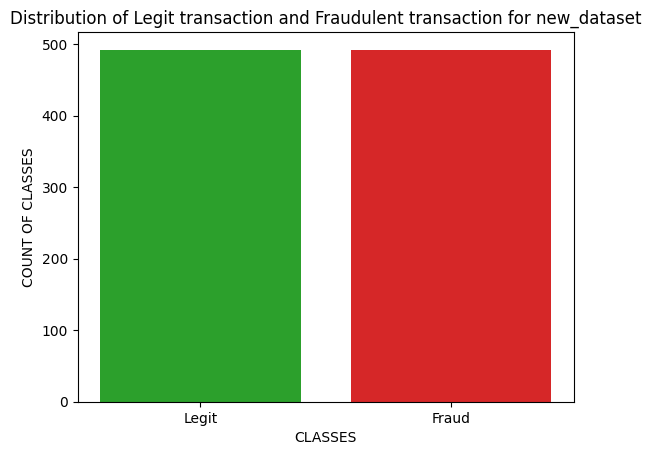

In [23]:
# Visual representation for distribution of classes in new_datset
plt.title('Distribution of Legit transaction and Fraudulent transaction for new_dataset')

# Define colors for each category

colors = {'Legit':'tab:green','Fraud':'tab:red'}

# Creating the bar chart 
plt.bar(Index_visual2,Value_visual2,color = [colors.get(x) for x in Index_visual2])
plt.xlabel('CLASSES')
plt.ylabel('COUNT OF CLASSES')
plt.show()

# observed:
#### The mean of the credit_card_fraud dataset and newly created new_dataset are some what same so that we can say this sample is good.

# Splitting the dataset into Features and Evaluation:

In [24]:
X = new_dataset.drop(columns = 'Class')
y = new_dataset['Class']

In [25]:
X.shape,y.shape

((984, 30), (984,))

#### Splitting the dataset into Training data and Testing data

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3,stratify=y)

In [27]:
print('The shape of  train dataset  :',X.shape,'\n''The shape of X_train:',X_train.shape,'\n''The shape of Y_train:',y_train.shape)


The shape of  train dataset  : (984, 30) 
The shape of X_train: (787, 30) 
The shape of Y_train: (787,)


In [28]:
print('The shape of test dataset     :',y.shape,'\n''The shape of X_test:',X_test.shape,'\n''The shape of Y_test:',y_test.shape)

The shape of test dataset     : (984,) 
The shape of X_test: (197, 30) 
The shape of Y_test: (197,)


# Model training:


### Logistic Regression:

In [29]:
model = LogisticRegression()

In [30]:
# Training the model[Logistic Regression] in the training dataset
model.fit(X_train,y_train)

LogisticRegression()

# Model Evaluation

# Accuracy Score

In [31]:
# Accuracy score on training dataset
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)

print('Accuracy on training data :',training_data_accuracy)

# Accuracy score on testing dataset
X_test_prediction = model.predict(X_test)
testing_data_accuracy  = accuracy_score(X_test_prediction,y_test)

print('Accuracy on testing data:',testing_data_accuracy)

Accuracy on training data : 0.9504447268106735
Accuracy on testing data: 0.9441624365482234


# Classification Report

In [32]:
print(f'Classification Report : \n  \n{classification_report(y_test,X_test_prediction)}')

Classification Report : 
  
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        99
           1       0.96      0.93      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



# Confusion Matrix:

In [33]:
Confusion_Matrix = pd.DataFrame(data = confusion_matrix(y_test,X_test_prediction) ,index=['Actual No','Actual Yes'], columns=['Predicted no','Predicted Yes'])
Confusion_Matrix

,Predicted no,Predicted Yes
Actual No,95,4
Actual Yes,7,91


## Visual Representation of Confusion matrix 


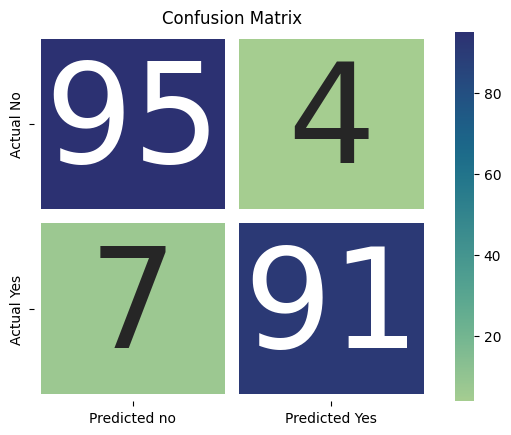

In [34]:
sns.heatmap(data=Confusion_Matrix,annot = True , cmap='crest',linewidths= 10,linecolor = 'white',annot_kws={'size':100})
plt.title("Confusion Matrix")
plt.show()

# Summary:
##### ---> This model has Accuracy on Training Data :0.9504447268106735
##### ----> Accuracy on Unseen data: 0.9441624365482234
##### -----> The confusion matrix tells that this model correctly predicted 91 Fraud transaction out of 98.